In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = 'C:\\Users\\Akshay\\Downloads\\Machine Learning Competition\\Z Dockship\\Boat Type Classification Challenge'

In [3]:
test_path = data_dir+'\\TEST\\'
train_path = data_dir+'\\TRAIN\\'

In [80]:
os.listdir(train_path+'buoy')[0]

'1.jpg'

In [81]:
buoy_cell = train_path+'buoy\\'+'1.jpg'
buoy_cell

'C:\\Users\\Akshay\\Downloads\\Machine Learning Competition\\Z Dockship\\Boat Type Classification Challenge\\TRAIN\\buoy\\1.jpg'

In [83]:
plt.imread(buoy_cell).shape

(720, 1280, 3)

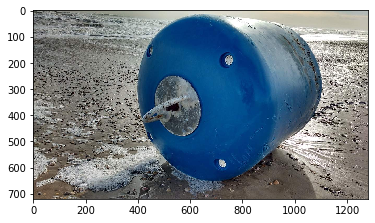

In [84]:
plt.imshow(plt.imread(buoy_cell))

In [7]:
train = pd.read_csv(os.path.join(train_path, 'COMBINED_TRAIN.csv'))
test = pd.read_csv(os.path.join(test_path, 'test.csv'))
train.head()

,Image,Class
0,buoy0.jpg,buoy
1,buoy1.jpg,buoy
2,buoy10.jpg,buoy
3,buoy11.jpg,buoy
4,buoy12.jpg,buoy


In [8]:
train.shape

(1162, 2)

In [9]:
train['Class'].value_counts()

sailboat           389
kayak              203
gondola            193
cruise_ship        191
ferry_boat          63
buoy                53
paper_boat          31
freight_boat        23
inflatable_boat     16
Name: Class, dtype: int64

In [10]:
test.head()

,Image
0,1.jpg
1,10.jpg
2,100.jpg
3,101.jpg
4,102.jpg


In [11]:
test.shape

(300, 1)

In [12]:
from tqdm import tqdm
from keras.preprocessing import image

train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('TRAIN/'+train['Image'][i], target_size=(300, 300, 1), grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

  0%|          | 0/1162 [00:00<?, ?it/s]C:\Users\Akshay\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 1162/1162 [00:09<00:00, 127.20it/s]


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Class'] = le.fit_transform(train['Class'])

In [14]:
from keras.utils import to_categorical

y = train['Class'].values
y = to_categorical(y)

In [15]:
test_image = []
for i in tqdm(range(test.shape[0])):
    img = image.load_img('TEST/'+test['Image'][i], target_size=(300, 300, 1), grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test = np.array(test_image)


  0%|          | 0/300 [00:00<?, ?it/s]C:\Users\Akshay\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 300/300 [00:02<00:00, 122.84it/s]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [17]:
from keras.models import Sequential, load_model    
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator 


In [18]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (300, 300, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Dense(9, activation = "softmax"))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 96)        8

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [21]:
model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))

Epoch 1/25
30/30 [==============================] - 80s 3s/step - loss: 2.0484 - acc: 0.3014 - val_loss: 1.9894 - val_acc: 0.2704
Epoch 2/25
30/30 [==============================] - 98s 3s/step - loss: 1.7347 - acc: 0.3563 - val_loss: 1.7948 - val_acc: 0.4506
Epoch 3/25
30/30 [==============================] - 82s 3s/step - loss: 1.5654 - acc: 0.4381 - val_loss: 1.8300 - val_acc: 0.3734
Epoch 4/25
30/30 [==============================] - 79s 3s/step - loss: 1.3893 - acc: 0.5242 - val_loss: 1.8157 - val_acc: 0.4549
Epoch 5/25
30/30 [==============================] - 81s 3s/step - loss: 1.3719 - acc: 0.5264 - val_loss: 1.6665 - val_acc: 0.4678
Epoch 6/25
30/30 [==============================] - 69s 2s/step - loss: 1.1442 - acc: 0.6028 - val_loss: 2.2515 - val_acc: 0.3991
Epoch 7/25
30/30 [==============================] - 69s 2s/step - loss: 1.0650 - acc: 0.6372 - val_loss: 2.0321 - val_acc: 0.4635
Epoch 8/25
30/30 [==============================] - 69s 2s/step - loss: 0.7756 - acc: 0.72

In [22]:
prediction = model.predict_classes(test)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [24]:
solution = pd.DataFrame({'Filename': test1['Image'], 'Class':le.inverse_transform(prediction)})
solution.head()

,Filename,Class
0,1.jpg,cruise_ship
1,10.jpg,buoy
2,100.jpg,sailboat
3,101.jpg,cruise_ship
4,102.jpg,cruise_ship


In [25]:
solution.to_csv('Solution.csv', index = False)